# Author: Kazi Amit Hasan

Department of Computer Science & Engineering, <br>
Rajshahi University of Engineering & Technology (RUET) <br>
Website: https://amithasanshuvo.github.io/ <br>
ResearchGate: https://www.researchgate.net/profile/Kazi_Amit_Hasan <br>
Linkedin: hhttps://www.linkedin.com/in/kazi-amit-hasan/ <br>
Email: kaziamithasan89@gmail.com

In [2]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

### Implementation

In [3]:
class KNearestNeighbor(object):
    def __init__(self, k=20):
        self.k = k
        
    def fit(self, X, y):
        # Store the original points
        
        self.X = X
        self.y = y
        
        return self
        
    def predict(self, X, y=None):
#         print("self.X:", self.X)
#         print("self.X.shape:", self.X.shape)
        
        # Initialize a zero distance matrix
        dists = np.zeros((X.shape[0], self.X.shape[0]))
#         print("dists.shape:", dists.shape)
        
        # Loop through all possible pairs and compute their distances
        for i in range(dists.shape[0]):
            for j in range(dists.shape[1]):
#                 print(i, j, X[i], self.X[j])
                dists[i, j] = self.distance(X[i], self.X[j])
                
#         print("dists:", dists)
        
        # Sort the distance array row-wise, and select the top k indexes for each row
        indexes = np.argsort(dists, axis=1)[:,:self.k]
#         print("indexes:", indexes)
        
        # Compute the mean of the values
        mean = np.mean(self.y[indexes], axis=1)
#         print("mean:", mean)
#         print("mean.shape:", mean.shape)
        
        return mean
                
    def distance(self, x, y):
        return np.sqrt(np.dot(x - y, x - y))

### Sample usage

Generate sample data

In [4]:
x = np.linspace(0, 5, 20)

In [5]:
m = 1.5
c = 1
y = m * x + c + np.random.normal(size=(20,))

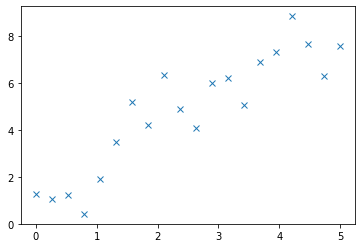

In [6]:
plt.plot(x, y, 'x')

Instantiate and fit model

In [11]:
model = KNearestNeighbor(k=10)

In [12]:
model.fit(x, y)

In [13]:
# predicted = model.predict(x)
predicted = model.predict(x.reshape(-1, 1))

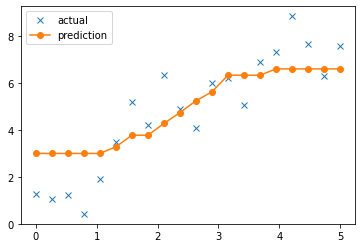

In [14]:
plt.plot(
    x, y, "x",
    x, model.predict(x), "-o"
)
plt.legend(["actual", "prediction"])